In [1]:
import numpy as np
import myNumpy

In [2]:
myNumpy.message()

Numerical Recipes with cpp & python -> let's have some numerical fun.


In [3]:
dir(myNumpy)

['Linear_interp',
 'Poly_interp',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'message',
 'vecFlt32',
 'vecFlt64']

# Interpolation

In [4]:
import matplotlib.pyplot as plt

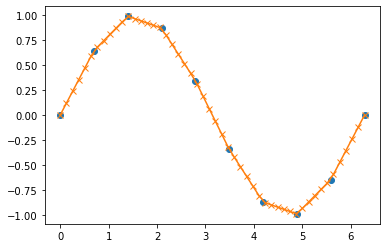

In [5]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)

xvals = np.linspace(0, 2*np.pi, 50)
yinterp = np.interp(xvals, x, y)

plt.plot(x, y, 'o')
plt.plot(xvals, yinterp, '-x')
plt.show()

## First approach around a point

In [6]:
a = np.array([1,2,3,4,5,6,7,8,9]).astype(np.float64)
b = a*a

In [7]:
x = myNumpy.vecFlt64(a)
y = myNumpy.vecFlt64(b)

In [8]:
myfunc = myNumpy.Linear_interp(x,y)

In [9]:
myfunc.rawinterp(3,3.2)

8.8

## Second approach with a curve

In [10]:
x = np.linspace(0, 2*np.pi, 10)
y = np.sin(x)
xvals = np.linspace(0, 2*np.pi, 50)

In [11]:
X = myNumpy.vecFlt64(x.astype(np.float64))
Y = myNumpy.vecFlt64(y.astype(np.float64))

In [12]:
f = myNumpy.Linear_interp(X,Y)

In [13]:
Y_interp = np.array([f.interp(j) for j in xvals]).astype(np.float64)

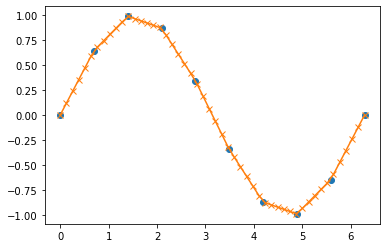

In [14]:
plt.plot(x, y, 'o')
plt.plot(xvals, Y_interp, '-x')
plt.show()

# Polynomial interpolation

In [15]:
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 1., 4., 9.1, 16.2, 25.])
z = np.polyfit(x, y, 3)
z

array([-0.01666667,  1.11428571, -0.1547619 ,  0.01428571])

In [16]:
p = np.poly1d(z)
p(0.5),p(3.5),p(10)

(0.21339285714286174, 12.408035714285722, 93.22857142857144)

In [17]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter('ignore', np.RankWarning)
    p30 = np.poly1d(np.polyfit(x, y, 30))

In [18]:
p30(4)

16.200000000000006

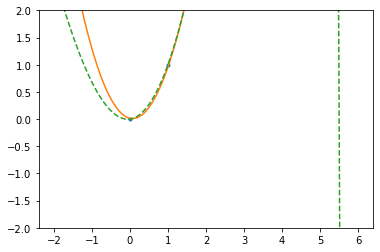

In [19]:
xp = np.linspace(-2, 6, 100)
_ = plt.plot(x, y, '.', xp, p(xp), '-', xp, p30(xp), '--')
plt.ylim(-2,2)
(-2, 2)
plt.show()

In [128]:
class vec2np:
    def __init__(self, nrVector):
        self.nrV = nrVector;
        self.np = np.array([self.nrV[i] for i in range(self.nrV.size())])
        

x = np.array([8.1,8.3,8.6,8.7])
y = np.array([16.9446,17.56492,18.50515,18.82091])

x = np.array([0.1,0.3,0.4,0.6,0.8])
y = np.sin(x)

X = myNumpy.vecFlt64(x.astype(np.float64))
Y = myNumpy.vecFlt64(y.astype(np.float64))

In [129]:
vec2np(Y).np

array([0.09983342, 0.29552021, 0.38941834, 0.56464247, 0.71735609])

In [144]:
f = myNumpy.Poly_interp(X,Y, 4)

In [146]:
f.interp(0.55)

0.04125253763344336

In [117]:
xvals = np.linspace(0, 6, 10)
Y_interp = np.array([f.interp(j) for j in xvals]).astype(np.float64)

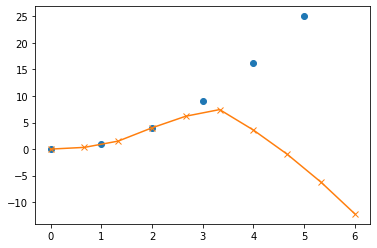

In [118]:
plt.plot(x, y, 'o')
plt.plot(xvals, Y_interp, '-x')
plt.show()